In [13]:
import hw6_helpers as helpers

import xarray as xr
import pandas as pd
import pytz
import datetime as dt
import metpy
from metpy.units import units
import pint_xarray
import numpy as np

import altair as alt
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('json')
alt.renderers.enable('svg')

RendererRegistry.enable('svg')

# User Inputs

In [2]:
sos_download_dir='/data2/elilouis/sublimationofsnow/sosnoqc'
DATE_FORMAT_STR = '%Y%m%d'
start_date = '20221201'; end_date = '20230501'
datelist = pd.date_range(
    dt.datetime.strptime(start_date, '%Y%m%d'),
    dt.datetime.strptime(end_date, '%Y%m%d'),
    freq='d'
).strftime('%Y%m%d').tolist()

VARIABLE_NAMES = [
    # Sonic Anemometer Data for 4 towers
    'tc_1m_uw',     'spd_1m_uw',     'dir_1m_uw',     'u_1m_uw',   'v_1m_uw',   'w_1m_uw',   'u_u__1m_uw',    'v_v__1m_uw',    'w_w__1m_uw',    
        'u_w__1m_uw',    'v_w__1m_uw',  'u_tc__1m_uw',  'v_tc__1m_uw',   'u_h2o__1m_uw',  'v_h2o__1m_uw',   'w_tc__1m_uw',   'w_h2o__1m_uw',
    'tc_3m_uw',     'spd_3m_uw',     'dir_3m_uw',     'u_3m_uw',   'v_3m_uw',   'w_3m_uw',   'u_u__3m_uw',    'v_v__3m_uw',    'w_w__3m_uw',    
        'u_w__3m_uw',    'v_w__3m_uw',  'u_tc__3m_uw',  'v_tc__3m_uw',   'u_h2o__3m_uw',  'v_h2o__3m_uw',   'w_tc__3m_uw',   'w_h2o__3m_uw',
    'tc_10m_uw',    'spd_10m_uw',    'dir_10m_uw',    'u_10m_uw',  'v_10m_uw',  'w_10m_uw',  'u_u__10m_uw',   'v_v__10m_uw',   'w_w__10m_uw',   
        'u_w__10m_uw',   'v_w__10m_uw', 'u_tc__10m_uw', 'v_tc__10m_uw',  'u_h2o__10m_uw', 'v_h2o__10m_uw',  'w_tc__10m_uw',  'w_h2o__10m_uw',

    'tc_1m_ue',     'spd_1m_ue',     'dir_1m_ue',     'u_1m_ue',   'v_1m_ue',   'w_1m_ue',   'u_u__1m_ue',    'v_v__1m_ue',    'w_w__1m_ue',    
        'u_w__1m_ue',    'v_w__1m_ue',  'u_tc__1m_ue',  'v_tc__1m_ue',   'u_h2o__1m_ue',  'v_h2o__1m_ue',   'w_tc__1m_ue',   'w_h2o__1m_ue',
    'tc_3m_ue',     'spd_3m_ue',     'dir_3m_ue',     'u_3m_ue',   'v_3m_ue',   'w_3m_ue',   'u_u__3m_ue',    'v_v__3m_ue',    'w_w__3m_ue',    
        'u_w__3m_ue',    'v_w__3m_ue',  'u_tc__3m_ue',  'v_tc__3m_ue',   'u_h2o__3m_ue',  'v_h2o__3m_ue',   'w_tc__3m_ue',   'w_h2o__3m_ue',
    'tc_10m_ue',    'spd_10m_ue',    'dir_10m_ue',    'u_10m_ue',  'v_10m_ue',  'w_10m_ue',  'u_u__10m_ue',   'v_v__10m_ue',   'w_w__10m_ue',   
        'u_w__10m_ue',   'v_w__10m_ue', 'u_tc__10m_ue', 'v_tc__10m_ue',  'u_h2o__10m_ue', 'v_h2o__10m_ue',  'w_tc__10m_ue',  'w_h2o__10m_ue',

    'tc_1m_d',      'spd_1m_d',     'dir_1m_d',     'u_1m_d',   'v_1m_d',   'w_1m_d',   'u_u__1m_d',    'v_v__1m_d',    'w_w__1m_d',    
        'u_w__1m_d',    'v_w__1m_d',  'u_tc__1m_d',  'v_tc__1m_d',   'u_h2o__1m_d',  'v_h2o__1m_d',   'w_tc__1m_d',   'w_h2o__1m_d',
    'tc_3m_d',      'spd_3m_d',     'dir_3m_d',     'u_3m_d',   'v_3m_d',   'w_3m_d',   'u_u__3m_d',    'v_v__3m_d',    'w_w__3m_d',    
        'u_w__3m_d',    'v_w__3m_d',  'u_tc__3m_d',  'v_tc__3m_d',   'u_h2o__3m_d',  'v_h2o__3m_d',   'w_tc__3m_d',   'w_h2o__3m_d',
    'tc_10m_d',     'spd_10m_d',    'dir_10m_d',    'u_10m_d',  'v_10m_d',  'w_10m_d',  'u_u__10m_d',   'v_v__10m_d',   'w_w__10m_d',   
        'u_w__10m_d',   'v_w__10m_d', 'u_tc__10m_d', 'v_tc__10m_d',  'u_h2o__10m_d', 'v_h2o__10m_d',  'w_tc__10m_d',  'w_h2o__10m_d',

    'tc_2m_c',  'spd_2m_c',     'dir_2m_c',     'u_2m_c',   'v_2m_c',   'w_2m_c',   'u_u__2m_c',    'v_v__2m_c',    'w_w__2m_c',    
        'u_w__2m_c',    'v_w__2m_c',  'u_tc__2m_c',  'v_tc__2m_c',   'u_h2o__2m_c',  'v_h2o__2m_c',   'w_tc__2m_c',   'w_h2o__2m_c',
    'tc_3m_c',  'spd_3m_c',     'dir_3m_c',     'u_3m_c',   'v_3m_c',   'w_3m_c',   'u_u__3m_c',    'v_v__3m_c',    'w_w__3m_c',    
        'u_w__3m_c',    'v_w__3m_c',  'u_tc__3m_c',  'v_tc__3m_c',   'u_h2o__3m_c',  'v_h2o__3m_c',   'w_tc__3m_c',   'w_h2o__3m_c',
    'tc_5m_c',  'spd_5m_c',     'dir_5m_c',     'u_5m_c',   'v_5m_c',   'w_5m_c',   'u_u__5m_c',    'v_v__5m_c',    'w_w__5m_c',    
        'u_w__5m_c',    'v_w__5m_c',  'u_tc__5m_c',  'v_tc__5m_c',   'u_h2o__5m_c',  'v_h2o__5m_c',   'w_tc__5m_c',   'w_h2o__5m_c',
    'tc_10m_c', 'spd_10m_c',    'dir_10m_c',    'u_10m_c',  'v_10m_c',  'w_10m_c',  'u_u__10m_c',   'v_v__10m_c',   'w_w__10m_c',   
        'u_w__10m_c',   'v_w__10m_c', 'u_tc__10m_c', 'v_tc__10m_c',  'u_h2o__10m_c', 'v_h2o__10m_c',  'w_tc__10m_c',  'w_h2o__10m_c',
    'tc_15m_c', 'spd_15m_c',    'dir_15m_c',    'u_15m_c',  'v_15m_c',  'w_15m_c',  'u_u__15m_c',   'v_v__15m_c',   'w_w__15m_c',   
        'u_w__15m_c',   'v_w__15m_c', 'u_tc__15m_c', 'v_tc__15m_c',  'u_h2o__15m_c', 'v_h2o__15m_c',  'w_tc__15m_c',  'w_h2o__15m_c',
    'tc_20m_c', 'spd_20m_c',    'dir_20m_c',    'u_20m_c',  'v_20m_c',  'w_20m_c',  'u_u__20m_c',   'v_v__20m_c',   'w_w__20m_c',   
        'u_w__20m_c',   'v_w__20m_c', 'u_tc__20m_c', 'v_tc__20m_c',  'u_h2o__20m_c', 'v_h2o__20m_c',  'w_tc__20m_c',  'w_h2o__20m_c',

    
    # Temperature & Relative Humidity Array 
    'T_2m_c', 'T_3m_c', 'T_4m_c', 'T_5m_c', 'T_6m_c', 'T_7m_c', 'T_8m_c', 'T_9m_c', 'T_10m_c',
    'T_11m_c', 'T_12m_c', 'T_13m_c', 'T_14m_c', 'T_15m_c', 'T_16m_c', 'T_17m_c', 'T_18m_c', 'T_19m_c', 'T_20m_c',

    'RH_2m_c', 'RH_3m_c', 'RH_4m_c', 'RH_5m_c', 'RH_6m_c', 'RH_7m_c', 'RH_8m_c', 'RH_9m_c', 'RH_10m_c',
    'RH_11m_c','RH_12m_c','RH_13m_c','RH_14m_c','RH_15m_c','RH_16m_c','RH_17m_c','RH_18m_c','RH_19m_c','RH_20m_c',

    # Pressure Sensors
    'P_20m_c',
    'P_10m_c', 'P_10m_d', 'P_10m_uw', 'P_10m_ue',

    # Blowing snow/FlowCapt Sensors
    'SF_avg_1m_ue', 'SF_avg_2m_ue',

    # Apogee sensors
    "Vtherm_c", "Vtherm_d", "Vtherm_ue", "Vtherm_uw", 
    "Vpile_c", "Vpile_d", "Vpile_ue", "Vpile_uw",
    "IDir_c", "IDir_d", "IDir_ue", "IDir_uw",

    # Snow-level temperature arrays (towers D and UW)
    'Tsnow_0_4m_d', 'Tsnow_0_5m_d', 'Tsnow_0_6m_d', 'Tsnow_0_7m_d', 'Tsnow_0_8m_d', 'Tsnow_0_9m_d', 'Tsnow_1_0m_d', 'Tsnow_1_1m_d', 'Tsnow_1_2m_d', 'Tsnow_1_3m_d', 'Tsnow_1_4m_d', 'Tsnow_1_5m_d',
    'Tsnow_0_4m_uw', 'Tsnow_0_5m_uw', 'Tsnow_0_6m_uw', 'Tsnow_0_7m_uw', 'Tsnow_0_8m_uw', 'Tsnow_0_9m_uw', 'Tsnow_1_0m_uw', 'Tsnow_1_1m_uw', 'Tsnow_1_2m_uw', 'Tsnow_1_3m_uw', 'Tsnow_1_4m_uw', 'Tsnow_1_5m_uw',
    
    # Downward Facing Longwave Radiometer (tower D) - for measuring snow surface temperature
    'Rpile_out_9m_d',
    'Tcase_out_9m_d',
    
    # Upward facing shortwave radiometer (tower D) - for measuring incoming solar radiation!
    'Rsw_in_9m_d',
]

# Download Data

In [3]:
from urllib.error import URLError
# We make sure that we aren't accessing variables that don't exist in the datasets
# This is necessary because some daily NetCDF files don't have all the expected variables
# (for example because an instrument was down). In that case, we want to add that variable
# to the dataset, filled with nans, which helpers.merge_datasets_with_different_variables
# handles for us
datasets = []
for date in datelist:
    try:
        ds = xr.open_dataset(helpers.download_sos_data_day(date, sos_download_dir, cache=False, planar_fit=False))
    # Some dates are missing
    except URLError:
        print(f"failed on {date}, skipping")
    datasets.append(ds[set(ds.data_vars).intersection(VARIABLE_NAMES)])
sos_ds = helpers.merge_datasets_with_different_variables(datasets, dim='time')

failed on 20230422, skipping
failed on 20230423, skipping
failed on 20230424, skipping
failed on 20230425, skipping
failed on 20230426, skipping
failed on 20230427, skipping
failed on 20230428, skipping
failed on 20230429, skipping
failed on 20230430, skipping
failed on 20230501, skipping


# Data cleaning and calculations

## Fill in missing timestamps (with nans)

Note that this occurs if there is missing data at the beginning or end of day - those timestamps will be left out of the dataset. 

In [4]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

def date_range(start_date, end_date, increment, period):
    result = []
    nxt = start_date
    delta = relativedelta(**{period:increment})
    while nxt <= end_date:
        result.append(nxt)
        nxt += delta

    return result

dt_list = date_range(pd.to_datetime(sos_ds.time.values[0]), pd.to_datetime(sos_ds.time.values[-1]), 5, 'minutes')
sos_ds = sos_ds.drop_duplicates(dim='time').reindex(time=dt_list)

## Calculate surface temperatures

Add new calculated variables to the dataset

From EOL (https://www.eol.ucar.edu/content/calculation-long-wave-radiation)
$$
R_{lw} = R_{pile} + SB * T_{case}^4
$$
And the steven-boltzman law
$$
T_{surface} = \Big( \frac {R_{lw}}{ \epsilon \sigma } \Big)^\frac{1}{4}
$$

In [5]:
SB = 5.67e-08 # steven boltzman constant, W/m^2/degK^4
SNOW_EMMISIVITY = 0.98
sos_ds['Tsurf_rad_d'] = ((sos_ds['Rpile_out_9m_d'] + SB * (sos_ds['Tcase_out_9m_d']+273.15)**4)/(SNOW_EMMISIVITY*SB))**(1/4) - 273.15

# Surface Temperature
# calculate from apogees
sos_ds['Tsurf_c'] = (['time'],  helpers.apogee2temp(sos_ds, 'c').values)
sos_ds['Tsurf_d'] = (['time'],  helpers.apogee2temp(sos_ds, 'd').values)
sos_ds['Tsurf_ue'] = (['time'],  helpers.apogee2temp(sos_ds, 'ue').values)
sos_ds['Tsurf_uw'] = (['time'],  helpers.apogee2temp(sos_ds, 'uw').values)

/home/elilouis/mambaforge/envs/arm/lib/python3.11/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/elilouis/mambaforge/envs/arm/lib/python3.11/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


## Calculate potential and virtual potential temperatures in the air

Note that we use the `metpy` library here, which assigns units to each dataarray, in a "object oriented" way using the `pint` library. You don't really have to worry about this, only to know that it can make working with the data more confusing. Know that at the end of the following cell, when we assign the new variables to the dataset, we remove any remnants of the `pint` library, and we assign an attribute `units` to each new variable so that they somewhat match the variables provided in the original dataset.

In [6]:
# Potential Temperature
# iterate over pressure measurements
for i in range(2,21):
    absolute_temperature = sos_ds[f'T_{i}m_c'] * units.celsius
    relative_humidity = sos_ds[f'RH_{i}m_c']
    absolute_pressure = sos_ds['P_10m_c'] * units.millibar
    height_relative_to_10m_pressure_sensor = i*units.m - (10*units.m)

    height_adj_pressure = metpy.calc.add_height_to_pressure(
        absolute_pressure, 
        height_relative_to_10m_pressure_sensor
    )
    potential_temperature = metpy.calc.potential_temperature(    
            height_adj_pressure,
            absolute_temperature
    ).pint.to(units.celsius)
    mixing_ratio = xr.DataArray(relative_humidity/100) * metpy.calc.saturation_mixing_ratio(
        height_adj_pressure,
        absolute_temperature
    )
    air_density = metpy.calc.density(height_adj_pressure, absolute_temperature, mixing_ratio)
    virtual_potential_temperature = metpy.calc.virtual_temperature(
        potential_temperature,
        mixing_ratio,
    )

    virtual_temperature = metpy.calc.virtual_temperature(
        absolute_temperature,
        mixing_ratio,
    )
   
    sos_ds[f'Tpot_{i}m_c'] = (['time'], potential_temperature.pint.magnitude)
    sos_ds[f'Tpot_{i}m_c'] = sos_ds[f'Tpot_{i}m_c'].assign_attrs(units = str(potential_temperature.pint.units))

    sos_ds[f'Tvirtual_{i}m_c'] = (['time'], virtual_temperature.pint.magnitude)
    sos_ds[f'Tvirtual_{i}m_c'] = sos_ds[f'Tvirtual_{i}m_c'].assign_attrs(units = str(virtual_temperature.pint.units))

    sos_ds[f'Tpotvirtual_{i}m_c'] = (['time'], virtual_potential_temperature.pint.magnitude)
    sos_ds[f'Tpotvirtual_{i}m_c'] = sos_ds[f'Tpotvirtual_{i}m_c'].assign_attrs(units = str(virtual_potential_temperature.pint.units))

    sos_ds[f'airdensity_{i}m_c'] = (['time'], air_density.pint.magnitude)
    sos_ds[f'airdensity_{i}m_c'] = sos_ds[f'airdensity_{i}m_c'].assign_attrs(units = str(air_density.pint.units))

    sos_ds[f'mixingratio_{i}m_c'] = (['time'], mixing_ratio.pint.magnitude)
    sos_ds[f'mixingratio_{i}m_c'] = sos_ds[f'mixingratio_{i}m_c'].assign_attrs(units = str(mixing_ratio.pint.units))


## Convert wide dataset to tidy dataset and convert to local time

In [ ]:
tidy_df = helpers.get_tidy_dataset(sos_ds, list(sos_ds.data_vars))
tidy_df = helpers.modify_df_timezone(tidy_df, pytz.UTC, pytz.timezone('US/Mountain'))

# Problem 1: Measuring snow temperatures and deciding how to trust the measurements

Using the data presented in labs, pick three different 3-day-durationperiods in each of early season (Nov-Dec), mid season (Jan-Feb) and late season (April). Plot the temperatures. Determine which of the “snow temperature” sensors are actually in the snow at each side. Also determine which sensors are “broken” and displaying nonsensicle results. Explain your answer

In [20]:
def thermistor_plot(src):
    return alt.Chart(src).transform_filter(
        alt.datum.measurement == 'snow temperature'
    ).transform_window(
        rolling_mean='mean(value)',
        frame=[-6,6],
        groupby=['height']
    ).mark_line().encode(
        alt.X('time:T'),
        alt.Y("rolling_mean:Q", title="Temperature (˚C, 30min rolling avg)"),
        alt.Color("height:N", scale=alt.Scale(scheme='rainbow')),
        alt.Facet("tower:N", columns=2),
        tooltip = 'height:N'
    ).properties(
        width=600, 
        height=200, 
        title='In-snow thermistor arrays at Kettle Ponds'
    ).interactive()

thermistor_plot(tidy_df[(tidy_df.time < '2022-12-13') & (tidy_df.time > '2022-12-10')]) & \
thermistor_plot(tidy_df[(tidy_df.time < '2023-02-07') & (tidy_df.time > '2023-02-04')]) & \
thermistor_plot(tidy_df[(tidy_df.time < '2023-04-07') & (tidy_df.time > '2023-04-04')])

* Between 12/10/22 - 12/12/22, we see the all the thermistors are changing in unison, with no "dampening" of fluctuations occuring with a change in height. This indicates that all the thermistors are in the air. We don't see any evidence of broken thermistors during this time period. Same goes for the UW tower.
* Between 2/4/23 - 2/6/23, we see that a dampening effect impacts thermistors at heights 0.9m and below. Overnight Feb 4-5, the 1.0m thermistor records the coldest temperature of all thermistors, with all measurements above 1.0m getting warmer with height above the snow surface and all measurements below 1.0m showing a gradient in temperature warming towards the ground-snow interface. On the day of Feb 5, the 1.0m thermistor gets to temps above 0˚C and the 0.9m thermistor does not, confirming that the snowdepth is between the 0.9 and 1.0m thermistors. On the UW tower, we determine that the snow depth is between the 1.2 and 1.3m thermistors for similar reasons.
* Between 4/4/23 - 4/6/23, it is harder to say definitively what is going on. Considering d tower, we see that all the thermistors measure near-constant temps below 0˚C besides the 0.5 and 0.4m thermistors. The constant temps indicate that the thermistors are all under the snow. The fact that the thermistors generally demonstrate the warm-to-cold gradient from the ground surface to the snow surface, we think all the thermistors may be working decently except for the 0.5 and 0.4 thermistors. It's possible that all of them are out of calibration, with the 0.4 and 0.5 meters especially so. On uw tower, the 1.0 and 0.4m thermistors are definitely out of calibration or broken. The 0.7m thermistor also seems wrong - its warmer than all the other measurements. I think all of the thermistors are buried in the snow at the UW tower too, but some of the thermistors are out of calibration

# Problem 2

Static stability is related to the change in temperature with height. If you choose to use the sounding data, you must be sure to use potential temperature. For this problem, just focus on our data from the surface to 20 m, and it's okay to just use temperature within that narrow elevation range. The change in temperature with height above the surface is a measure of the stability. Pick out three different days in our dataset and calculate dT/dz over the first 2 meters and over the first 20 meters. Make plots of temperature vs elevation. Is the change in temperature with height linear? Does that depend on the day? What do you think controls the change in temperature with height over the snow? Feel free to plot some other variables from earlier labs to test your hypotheses.

To look at this data and look at a reasonable number of temperature profiles, we plot the temperature profiles only from the first measurement (minute 02:30) of each hour, and only look at data from every 3rd hour of the day

In [21]:
src = tidy_df.copy()
src['hour'] = src['time'].dt.hour

src1 = src.set_index('time').loc['2023-02-01'].reset_index()
src2 = src.set_index('time').loc['2023-02-19'].reset_index()
src3 = src.set_index('time').loc['2023-03-18'].reset_index()

In [22]:
def calculate_gradients(src):
    src_grad = src[
        src.variable.isin(['T_2m_c', 'T_20m_c', 'Tsurf_c'])
    ].set_index(["time", 'hour', 'tower']).pivot_table(
        index = ['time', 'hour', 'tower'],
        columns='height',
        values='value'
    ).reset_index()
    src_grad['Gradient (0-2m)'] = (src_grad[2.0] - src_grad[0.0]) / 2
    src_grad['Gradient (0-20m)'] = (src_grad[20.0] - src_grad[0.0]) / 20
    return src_grad

src1_grad = calculate_gradients(src1).drop(columns=[0.0, 2.0, 20.0])
src2_grad = calculate_gradients(src2).drop(columns=[0.0, 2.0, 20.0])
src3_grad = calculate_gradients(src3).drop(columns=[0.0, 2.0, 20.0])

/tmp/ipykernel_342704/931779133.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  src1_every_4th_hour = src1_every_4th_hour[
/tmp/ipykernel_342704/931779133.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  src2_every_4th_hour = src2_every_4th_hour[
/tmp/ipykernel_342704/931779133.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  src3_every_4th_hour = src3_every_4th_hour[


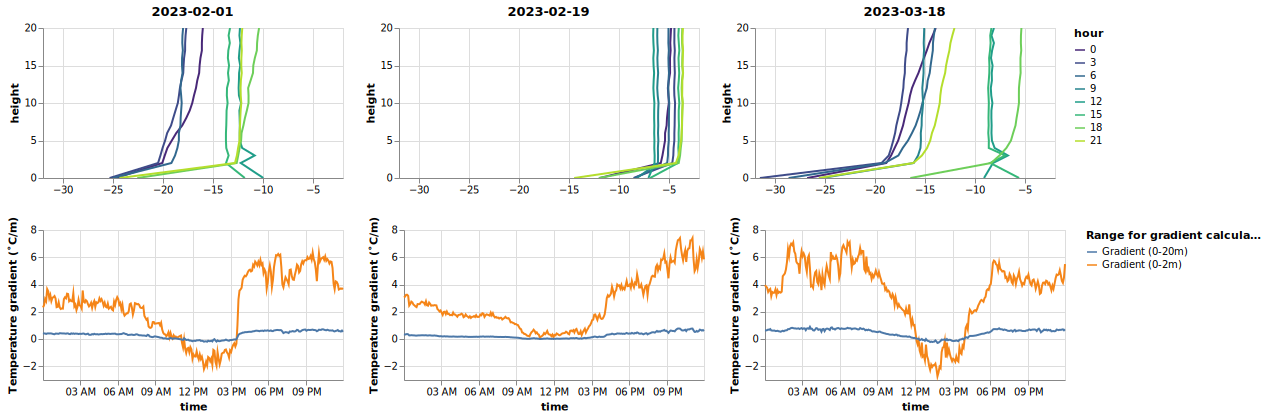

In [23]:
profile_base = alt.Chart().transform_filter(
    alt.FieldOneOfPredicate('measurement', ['temperature', 'surface temperature'])
).transform_filter(
    alt.datum.tower == 'c'
).mark_line(strokeWidth=2).encode(
    alt.X("value:Q", sort='-y', title=None),
    alt.Y("height:Q"),
    alt.Color("hour:O", scale=alt.Scale(scheme="viridis")),
    tooltip="hour:O"
).properties(
    width=300, 
    height=150
).interactive()

tseries_base = alt.Chart().transform_fold(
    ['Gradient (0-2m)', 'Gradient (0-20m)']
).mark_line().encode(
    alt.X("time:T"),
    alt.Y("value:Q", title='Temperature gradient (˚C/m)'),
    alt.Color("key:N", title='Range for gradient calculation')
).properties(
    width=300, 
    height=150
)


src1_every_4th_hour, src2_every_4th_hour, src3_every_4th_hour = src1.copy(), src2.copy(), src3.copy()

src1_every_4th_hour = src1_every_4th_hour[
        src1_every_4th_hour['time'].dt.minute == 2
    ][src1_every_4th_hour['time'].dt.hour%3 == 0]
src2_every_4th_hour = src2_every_4th_hour[
        src2_every_4th_hour['time'].dt.minute == 2
    ][src2_every_4th_hour['time'].dt.hour%3 == 0]
src3_every_4th_hour = src3_every_4th_hour[
        src3_every_4th_hour['time'].dt.minute == 2
    ][src3_every_4th_hour['time'].dt.hour%3 == 0]

((
    alt.layer(profile_base, data=src1_every_4th_hour).properties(title='2023-02-01') |
    alt.layer(profile_base, data=src2_every_4th_hour).properties(title='2023-02-19') |
    alt.layer(profile_base, data=src3_every_4th_hour).properties(title='2023-03-18')
).resolve_scale(x='shared') & \
(alt.layer(tseries_base, data=src1_grad) | alt.layer(tseries_base, data=src2_grad) | alt.layer(tseries_base, data=src3_grad)).resolve_scale(y='shared')).resolve_scale(color="independent")

 Is the change in temperature with height linear? Does that depend on the day? What do you think controls the change in temperature with height over the snow? Feel free to plot some other variables from earlier labs to test your hypotheses.

 Looking at temperature profiles over 3 different days, we see that temperature gradients above the snow surface are rarely linear because the snow surface is generally colder than the air above, and the increase in temperature immediately above the snow is far greater than temperature changes higher up. On some days, in the middle of the day (e.g., 2023-02-01 1200 and 2023-03-18 1200-1500), the profile is near linear, but otherwise has a very steep gradient close to the snow. Gradients above the 2m measurement vary, with some times having continued positive gradients above 2m (i.e. the night hours of 2023-02-01 and 2023-03-18), while on other days, temperate gradients above 2m are approximatley 0 (most of the day 2023-02-19). 

 The 0-2m discrete/numerical calculation of gradient is almost always greater than that of the 0-20m discrete gradient because of the persistent, large near-snow-surface temperature gradient that generally dominates the temperature profiles.

 I believe that generally wind speed controls the temperature gradients, with higher wind speeds allowing the atmospheric boundary layer to be more "well-mixed" when there is more wind-generated shear to mix the air vertically. When wind speeds are lower, the stable temperature gradients can resist the relatively little wind-generated shear. To test this hypothesis, we look at time series of wind speeds at 2 and 10m on these days. From this hypothesis, we would expect on average larger wind speeds on 02/19.

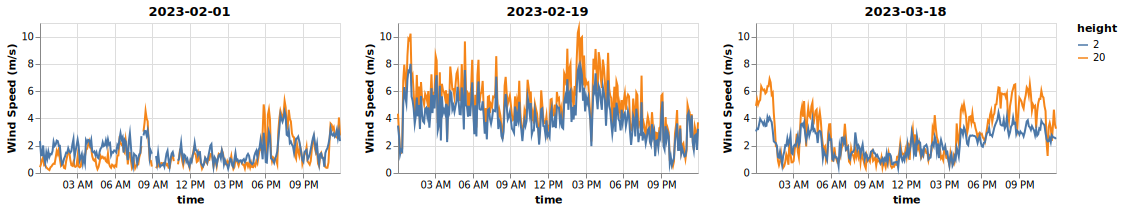

In [24]:
base = alt.Chart().mark_line().transform_filter(
    alt.FieldOneOfPredicate('variable', ['spd_2m_c', 'spd_20m_c'])
).encode(
    alt.X("time:T"),
    alt.Y("value:Q", title='Wind Speed (m/s)'),
    alt.Color("height:N")
).properties(
    width=300, 
    height=150
)

(
    alt.layer(base, data=src1).properties(title='2023-02-01') | 
    alt.layer(base, data=src2).properties(title='2023-02-19') | 
    alt.layer(base, data=src3).properties(title='2023-03-18')
).resolve_scale(y='shared')

Our theory appears to be confirmed.

One limit to our theory may come about during very stable conditions when anabatic and katabatic winds, low-level-jets, can product high wind speeds because of the large temperature gradients that exist. So I would expect that wind speed *above* some threshold level is likely to induce mixing, and wind speeds that high are probably due to synoptic conditions. *Below* some threshold, wind speeds could have some variance and not exert control on the temperature gradient. In fact, in during snyoptically weak and clear sky conditions that are favorable to the development of thermal winds, higher wind speeds may actually be associated with larger temperature inversions/gradients. 